In [1]:
#Importing all needed libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import datetime as dt
from datetime import datetime

plt.style.use('ggplot')

In [2]:
#Find current working directory

#Cath's
os.chdir('C://Users/Catharina/Desktop')

#Patrick's
#os.chdir('C://Users//PATWEB/Desktop')

In [3]:
#Reads in txt file and adds headers 
#[TODO] Cath, look at setting a specific type for column 18 
df = pd.read_table('FLAT_RCL.txt', names = ["Record_ID","CAMPNO","MAKETXT","MODELTXT",
                                            "YEARTXT","MFGCAMPNO","COMPNAME","MFGNAME",
                                            "BGMAN","ENDMAN","RCLTYPECD","POTAFF","ODATE",
                                            "INFLUENCED_BY","MFGTXT","RCDATE","DATEA",
                                            "RPNO","FMVSS","DESC_DEFECT","CONEQUENCE_DEFECT",
                                            "CORRECTIVE_ACTION","NOTES","RCL_CMPT_ID"] )

C:\Users\Catharina\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#display dimensions of dataframe 'df'
df.shape

(123899, 24)

In [5]:
#[TODO] Update sort_values to sort

#converts content of column 'RCDATE' to desired timestamp format
df['Timestamp']=pd.to_datetime(df['RCDATE'],format='%Y%m%d',errors='ignore')


#create a column 'Year' 
df['Year'] = df['Timestamp'].apply(lambda x: "%s" %(x.year))

#sort dataframe by the recall year in order to have 'month/year' groups in chronological order
df=df.sort(columns='Year')

#create 'Month/Year' column to prepare for grouping
df['Week/Year'] = df['Timestamp'].apply(lambda x: "%s/%s" %(x.week, x.year))

C:\Users\Catharina\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [6]:
#if column 'MAKETXT' lists 'MERCEDES' as content, rename to 'MERCEDES BENZ'
df.ix[(df.MAKETXT=='MERCEDES'),['MAKETXT']]='MERCEDES BENZ'

#if column 'MAKETXT' lists 'MERCEDES' as content, rename to 'MERCEDES BENZ'
df.ix[(df.MAKETXT=='MERCEDES-BENZ'),['MAKETXT']]='MERCEDES BENZ'

#Use when you want Audi, BMW, and Mercedes
#We should refactor code to split the dataframe in one area. Aka the "df" should be something like ger_df
df=df[(df['MAKETXT'].str.contains("AUDI|BMW|MERCEDES")==True)
    & (df['MAKETXT'].str.contains("AUDIOVOX")==False)
    & (df['MAKETXT'].str.contains("JL")==False)]

#Use when you want only Mercedes
mb_df=df[(df['MAKETXT'].str.contains("MERCEDES")==True)
    & (df['MAKETXT'].str.contains("AUDIOVOX")==False)
    & (df['MAKETXT'].str.contains("JL")==False)]

#Use when you only want SUVs
#This is a dirty hodgepodge of random search strings, but had to be done for now...
suv_df=mb_df[(df['MODELTXT'].str.contains("M CLASS|"
                                         "M-CLASS|"
                                         "ML|"
                                         "GL|"
                                         "M")==True)
    & (df['MODELTXT'].str.contains("GLK|"
                                   "GLC|"
                                   "GLA|"
                                   "MERCEDES|"
                                   "MATS|"
                                   "MAT|"
                                   "BROU|"
                                   "SMART|"
                                   "CLA45|"
                                   "SLR|"
                                   "S63|"
                                   "S65|"
                                   "GT S|"
                                   "METRIS")==False)]

C:\Users\Catharina\Anaconda2\lib\site-packages\ipykernel\__main__.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [9]:
airbags = suv_df['COMPNAME'].str.contains("AIR BAG")
airbags

11829     False
7214      False
7213      False
6174      False
8027      False
15320     False
3104      False
3103      False
3105      False
2402      False
934       False
57439     False
57438     False
57437     False
57436     False
57435     False
57434     False
41103     False
37832     False
75073     False
75071     False
75070     False
75069     False
75067     False
75068     False
77357     False
77361     False
77336     False
78252     False
78253     False
          ...  
122753     True
122752     True
122750     True
122730     True
122731     True
122732     True
122733     True
122734     True
122735     True
122736     True
122749     True
122748     True
122747     True
122746     True
122745     True
122744     True
122751     True
122743     True
122741     True
122740     True
122739     True
122738     True
122737     True
122742     True
112393    False
112392    False
112391    False
112390    False
112389    False
108961    False
Name: COMPNAME, dtype: b

In [9]:
df = df.dropna(subset=['Timestamp', 'Year'])

In [10]:
#Unstacking from multiindex series back to dataframe
graphdata = df.groupby(by=['Timestamp','MAKETXT'])['POTAFF'].sum()
graphdata = graphdata.reset_index().pivot(index='Timestamp', columns='MAKETXT')
graphdata.index.to_datetime()

#Look at address below for resample docs
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
graphdata = graphdata.resample('5A').sum()

graphdata.head()
graphdata.describe

<bound method DataFrame.describe of                 POTAFF                           
MAKETXT           AUDI          BMW MERCEDES BENZ
Timestamp                                        
1966-12-31         NaN          NaN        4910.0
1971-12-31      3148.0     133590.0      103455.0
1976-12-31     97567.0     307011.0      606481.0
1981-12-31    294925.0     555756.0      273017.0
1986-12-31   7326420.0    2050919.0      257524.0
1991-12-31   3432318.0     773160.0     1721063.0
1996-12-31   6834556.0   17808954.0     1492003.0
2001-12-31   4364177.0   97118017.0      500421.0
2006-12-31   5152177.0    8595439.0     5845877.0
2011-12-31   1625122.0   20407633.0     5320436.0
2016-12-31  13385988.0  168053095.0    61840381.0
2021-12-31  10116782.0    6321710.0     1366836.0>

In [11]:
'''
fig=plt.figure()
ax=fig.add_subplot(111)
N=11

AudiData=graphdata['POTAFF,Audi']
BMWData=graphdata['POTAFF,BMW']

ind = np.arange(N)
width=0.35

Audi=ax.bar(ind,AudiData,width,
             color='black',
             error_kw=dict(elinewidth=2,ecolor='blue'))

BMW=ax.bar(ind+width,BMWData,width,
             color='blue',
             error_kw=dict(elinewidth=2,ecolor='black'))

ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,40)
ax.set_ylabel('Number of Vehicles')
ax.set_title('Number of Vehicles by MB and Market')
xTickMarks=['Recall'+str(i) for i in range (1,5)]
ax.set_xticks(ind+width)
xtickNames=ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.legend((Audi[0], BMW[0]), ('MB', 'Market'))

plt.show()

'''

"\nfig=plt.figure()\nax=fig.add_subplot(111)\nN=11\n\nAudiData=graphdata['POTAFF,Audi']\nBMWData=graphdata['POTAFF,BMW']\n\nind = np.arange(N)\nwidth=0.35\n\nAudi=ax.bar(ind,AudiData,width,\n             color='black',\n             error_kw=dict(elinewidth=2,ecolor='blue'))\n\nBMW=ax.bar(ind+width,BMWData,width,\n             color='blue',\n             error_kw=dict(elinewidth=2,ecolor='black'))\n\nax.set_xlim(-width,len(ind)+width)\nax.set_ylim(0,40)\nax.set_ylabel('Number of Vehicles')\nax.set_title('Number of Vehicles by MB and Market')\nxTickMarks=['Recall'+str(i) for i in range (1,5)]\nax.set_xticks(ind+width)\nxtickNames=ax.set_xticklabels(xTickMarks)\nplt.setp(xtickNames, rotation=45, fontsize=10)\n\nax.legend((Audi[0], BMW[0]), ('MB', 'Market'))\n\nplt.show()\n\n"

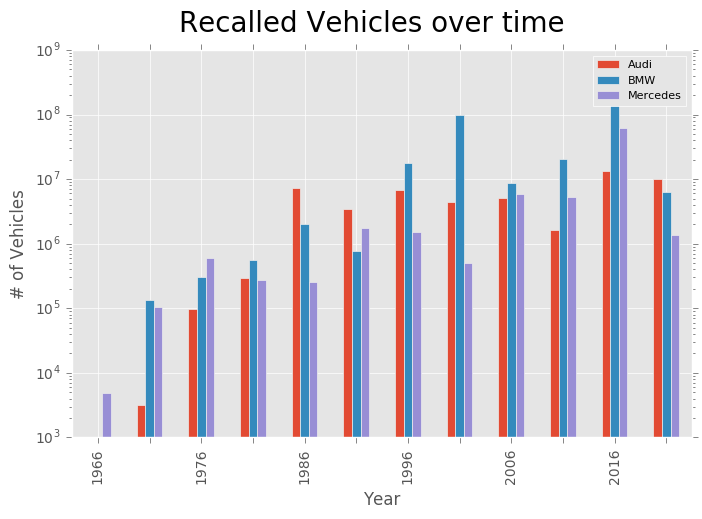

In [12]:
#Graphing section
ax = graphdata.plot(kind='bar', figsize= (8,5))
fig = ax.get_figure()

fig.suptitle('Recalled Vehicles over time', fontsize=20)

ax.legend(loc=2,prop={'size':6})
ax.legend(["Audi","BMW","Mercedes"], fontsize=8)

ax.set_xlabel("Year", fontsize=12)
# Initializes all ticklables as blank
xticklabels = ['']*len(graphdata.index)
# Every 2nd ticklable shows the year
xticklabels[::2] = [item.strftime('%Y') for item in graphdata.index[::2]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(xticklabels))

ax.set_ylabel("# of Vehicles", fontsize=12)
ax.set_yscale('log')

fig.savefig("output.pdf")

In [13]:
#Attempt to make a pie chart showing all suv recall basic types

#I'm looking at everything before the first colon in COMPNAME
#Sombody might want to look into this error but it didn't make sens
# to my 4:30 brain
suv_df['COMPNAME'] = suv_df.COMPNAME.apply(lambda x: x[:x.find(":")])

#Another problem is this will delete fields with no colon haha

C:\Users\Catharina\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
suv_df.to_excel('comp.xlsx')

Series([], Name: POTAFF, dtype: float64)

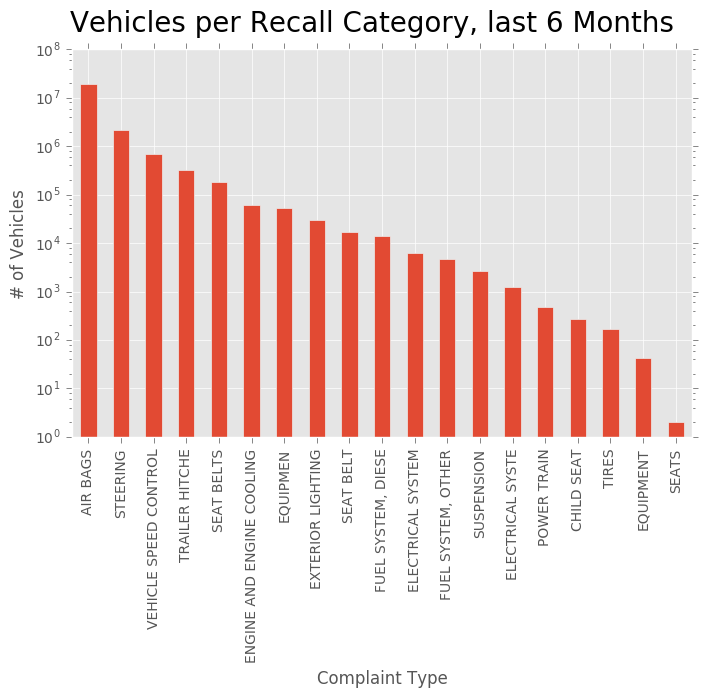

In [40]:
#Unstacking from multiindex series back to dataframe
#issuefreq = suv_df.groupby(by=['Timestamp','COMPNAME'])['POTAFF'].sum()
#issuefreq = suv_df.groupby(by=['COMPNAME'])['POTAFF'].sum()
#issuefreq = issuefreq.reset_index().pivot(index='Timestamp', columns='COMPNAME')
#issuefreq.index.to_datetime()

#Look at address below for resample docs
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
#issuefreq = issuefreq.resample('W').sum()

issuefreq = suv_df.groupby(by=['COMPNAME'])['POTAFF'].sum()
issuefreq.sort_values(inplace=True, axis=0, ascending=False)

ax2 = issuefreq.plot(kind='bar', figsize= (8,5))
fig2 = ax2.get_figure()
ax2.set_yscale('log')
fig2.savefig("output2.pdf")
ax2.set_xlabel("Complaint Type", fontsize=12)
ax2.set_ylabel("# of Vehicles", fontsize=12)
fig2.suptitle('Vehicles per Recall Category, last 6 Months', fontsize=20)
#ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(),rotation=45)

#start = issuefreq.index.searchsorted(dt.datetime(2016, 1, 2))
#end = issuefreq.index.searchsorted(dt.datetime(2017, 1, 4))
#start = pd.datetime(2015, 1, 1)
#end = pd.datetime(2016, 1, 1)
#drng = pd.bdate_range(start, end, freq='W')

#issuefreq.truncate(after='12/31/2016')
issuefreq.ix[start:end]